# **Marketing Campaign for Banking Products**



---



---


**Name of the Student**      : Vijay Manohar Devane

**Internship Project Topic** : Marketing Campaign for Banking Products

**Name of the Institute**    : Shri Guru Gobind Singhji Institute of Engineering and Technology, Nanded


---



---


## **Introduction**

The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

**Objective**
The classification goal is to predict the likelihood of a liability customer buying personal loans.

This is classification problem. We can solve this problem using following steps:

0. Importing Necessary Packages

1. Data Collection and Visualization

2. Exploratory Data Analysis (EDA)

3. Data Cleaning

4. Transformations for Feature Variables

5. Train-Test Split of Data

6. Applying Logistic Regression Model

7. Model Evaluation

8. Building various other classification Algorithms and its comparison

9. Business Understanding of this Model


   
   

## **Importing Necessary Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os


from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score, confusion_matrix, accuracy_score,recall_score
from sklearn.model_selection import learning_curve

from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import random
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import RandomOverSampler
import keras.backend as K
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
from sklearn.model_selection import train_test_split,cross_val_score



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## **Data Collection and Visualization**

We used Bank Personal Loan dataset. The dataset contains data of 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Link of dataset [Click Here](https://www.kaggle.com/itsmesunil/bank-loan-modelling/download).

### **Data Collection**

Importing the dataset from google drive by using pandas command.

In [3]:
original = pd.read_excel('Data/Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

### **Data Visualization**

**Attribute Information:**

* ID: Customer ID

* Age: Customer's age in completed years

* Experience: #years of professional experience

* Income: Annual income of the customer ($000)

* ZIP Code: Home Address ZIP code.

* Family: Family size of the customer

* CCAvg: Avg. spending on credit cards per month ($000)

* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

* Mortgage: Value of house mortgage if any. ($000)

* Personal Loan: Did this customer accept the personal loan offered in the last campaign?

* Securities Account: Does the customer have a securities account with the bank?

* CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

* Online: Does the customer use internet banking facilities?

* Credit card: Does the customer use a credit card issued by the bank?


In [4]:
feature=original.drop("Personal Loan",axis=1)
target=original["Personal Loan"]

loans = feature.join(target)

In [5]:
loans.head(5)  # Checking first 10 values information in dataset.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [6]:
loans.tail(5)    # Checking some last elements of dataset.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,1,1,0


In [7]:
loans.dtypes      # It checks the datatype of the each column data.

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [8]:
loans.columns    # It gives the no. of columns present in dataset.

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

Information on the features or attributes

The attributes can be divided accordingly :

* The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

* Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
* Securities Account - Does the customer have a securities account with the bank?
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
* Online - Does the customer use internet banking facilities?
* Credit Card - Does the customer use a credit card issued by UniversalBank?
Interval variables are as below:
* Age - Age of the customer
* Experience - Years of experience
* Income - Annual income in dollars
* CCAvg - Average credit card spending
* Mortage - Value of House Mortgage

Ordinal Categorical Variables are:

* Family - Family size of the customer
* Education - education level of the customer

The nominal variable is :

* ID
* Zip Code


In [9]:
loans.describe()    # It describes the statical summary of the dataset. 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [10]:
loans.shape       # It gives the dataset shape.

(5000, 14)

In [11]:
loans.isnull().sum()      # It gives count of any null values in data.

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [12]:
loans.where(loans < 0).count()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
Personal Loan          0
dtype: int64

## **Exploratory Data Analysis (EDA)**

### **Detailed info**

In [13]:
# Number of Unique in each column.
loans.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

In [14]:
# Number of People with Zero Mortgage.
# There are 3462 People with zero mortage out of 5000. (It makes skewed)
loans[loans['Mortgage'] == 0]['Mortgage'].count()

3462

In [15]:
# Number of People with Zero Credit Card spending per month.
# There are 106 people with zero credit card spending per month.
(loans.CCAvg==0).sum()

106

In [16]:
# Value count for all categorial columns.
loans.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [17]:
loans.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [18]:
loans['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [19]:
loans['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [20]:
loans['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [21]:
loans.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [22]:
listItem = []
for col in loans.columns :
    listItem.append([col,loans[col].dtype,
                     loans[col].isna().sum(),
                     round((loans[col].isna().sum()/len(loans[col])) * 100,2),
                    loans[col].nunique(),
                     list(loans[col].sample(5).drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.0,5000,"[799, 1492, 4466, 40, 1690]"
1,Age,int64,0,0.0,45,"[46, 43, 37, 55, 32]"
2,Experience,int64,0,0.0,47,"[15, 30, 33, 28, 11]"
3,Income,int64,0,0.0,162,"[24, 73, 42, 158, 41]"
4,ZIP Code,int64,0,0.0,467,"[94104, 93003, 93101, 95134, 92093]"
5,Family,int64,0,0.0,4,"[2, 3, 4]"
6,CCAvg,float64,0,0.0,108,"[1.5, 0.4, 2.4, 0.5, 1.9]"
7,Education,int64,0,0.0,3,"[1, 2, 3]"
8,Mortgage,int64,0,0.0,347,"[157, 0, 224]"
9,Securities Account,int64,0,0.0,2,[0]


### **Univariate Analysis**

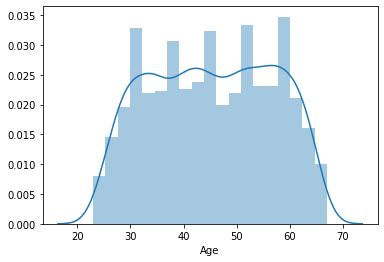

In [23]:
# Value counts of all categorical columns.
# It seems to have symmetric distribution.
sns.distplot(loans.Age)

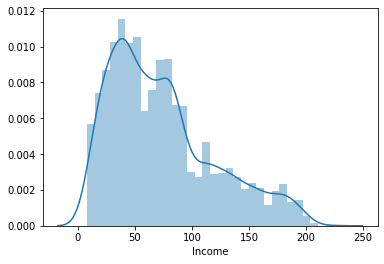

In [24]:
# Income is more skewed distribution
sns.distplot(loans.Income)

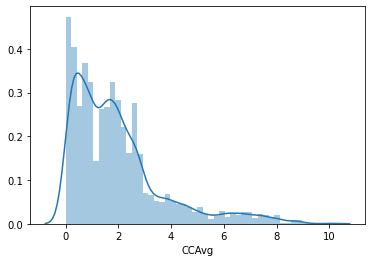

In [25]:
# Credit average is right skewed distribution.
sns.distplot(loans.CCAvg)

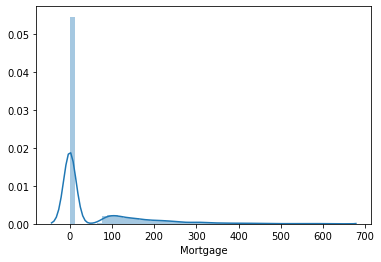

In [26]:
# Mortgage is highly skewed.
sns.distplot(loans.Mortgage)

### **Multivarient Analysis**


**Influence of income and education on personal loan**

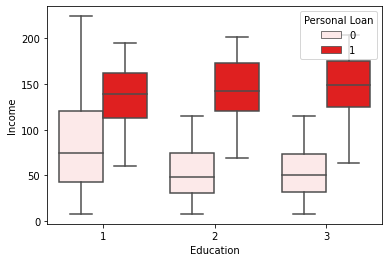

In [27]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=loans,color = 'Red')

**Observation :** It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

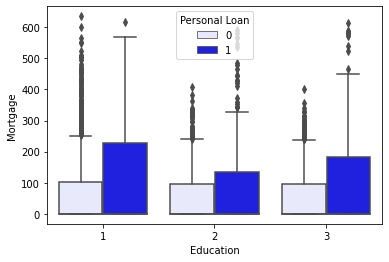

In [28]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=loans,color='Blue')

**Observation :** From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

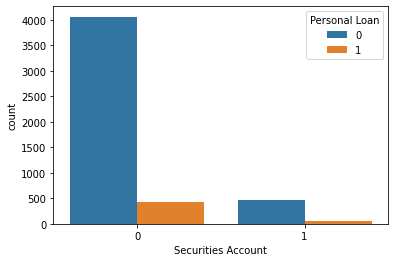

In [29]:
sns.countplot(x="Securities Account", data=loans,hue="Personal Loan")

**Observation :** Majority of customers who does not have loan have securities account

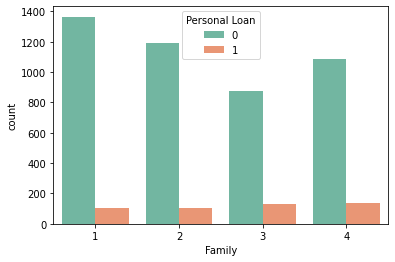

In [30]:
sns.countplot(x='Family',data=loans,hue='Personal Loan',palette='Set2')

**Observation:** Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

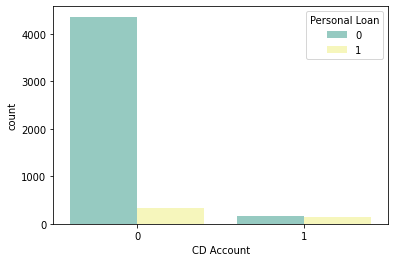

In [31]:
sns.countplot(x='CD Account',data=loans,hue='Personal Loan',palette = 'Set3') 

**Observation:** Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

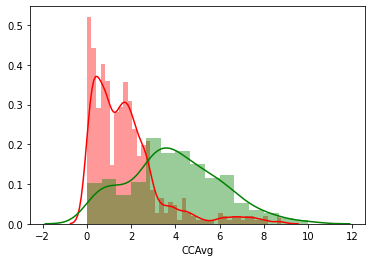

In [32]:
sns.distplot( loans[loans['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( loans[loans['Personal Loan'] == 1]['CCAvg'], color = 'g')

In [34]:
print('Credit card spending of Non-Loan customers: ',loans[loans['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', loans[loans['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0



**Observation:** The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0, 0.5, 'Age')

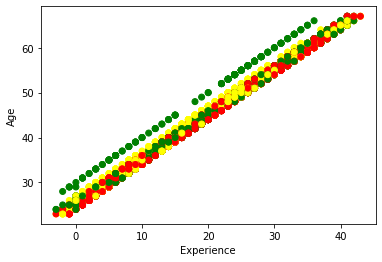

In [35]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(loans['Experience'],loans['Age'],c=loans['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

**Observation**: The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

## **Data Cleaning**


### **Missing value visualization**

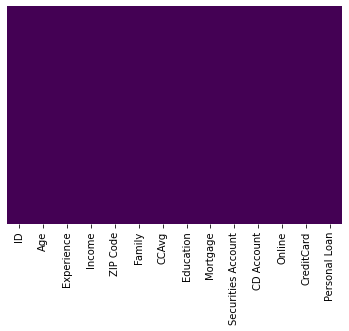

In [36]:
sns.heatmap(loans.isna(),yticklabels=False,cbar=False,cmap='viridis')

### **Irregular value analysis**

In [37]:
loans.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


**Irregular value visualization**

In [38]:
outvis = loans.copy()
def fungsi(x):
    if x<0:
        return np.NaN
    else:
        return x
    
outvis["Experience"] = outvis["Experience"].apply(fungsi)

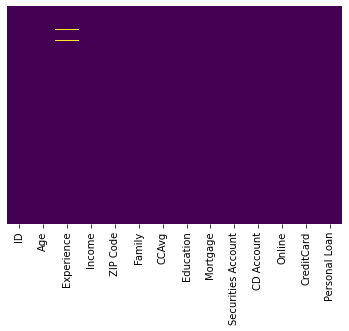

In [39]:
sns.heatmap(outvis.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**2nd Irregular value analysis**

In [40]:
pd.DataFrame(loans.groupby("Education").mean()["Experience"])

,Experience
Education,
1,20.065363
2,19.770492
3,20.471686


In [41]:
pd.DataFrame(loans.groupby("Age").mean()["Experience"]).tail(8)

,Experience
Age,
60,34.645669
61,35.672131
62,36.829268
63,37.638889
64,38.846154
65,39.812500
66,40.875000
67,41.833333


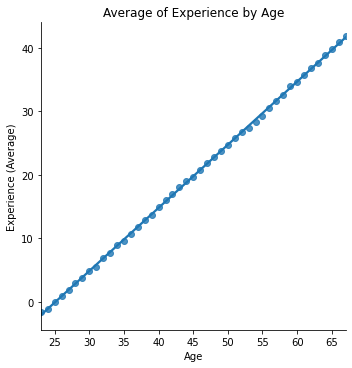

In [42]:
pltdf = pd.DataFrame(loans.groupby("Age").mean()["Experience"]).reset_index()
sns.lmplot(x='Age',y='Experience',data=pltdf)
plt.ylabel("Experience (Average)")
plt.title("Average of Experience by Age")
plt.show()

In [43]:
pd.DataFrame(loans[loans["Experience"]<0][["Age","Experience"]].sort_values("Age")).head()

,Age,Experience
2717,23,-2
3130,23,-2
3425,23,-1
2962,23,-2
909,23,-1


In [44]:
pd.DataFrame(loans[loans["Experience"]<0][["Age","Experience"]].sort_values("Age"))["Age"].unique()


array([23, 24, 25, 26, 28, 29])

In [45]:
pd.DataFrame(loans[loans["Experience"]<0][["Age","Experience"]].sort_values("Age"))["Experience"].unique()

array([-2, -1, -3])

**Irregular value handling feature 1**

In [46]:
loans["Experience"] = loans["Experience"].apply(abs)

In [47]:
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [48]:
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [49]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### **Feature correlation analysis**

The purpose of this section to find if there are possibility of multi-correlation between features and in the same time to get insight about which features (X) that have good correlation with our target (y).

In [50]:
feature = loans.drop(["ID","Personal Loan"],axis=1)
target = loans["Personal Loan"]


**Heatmap correlation**

Heatmap is one of simplest method to analyze feature correlation.

Heatmap correlation with only features (X) - we need to know correlation between features and avoid multi-correlation features,
Heatmap correlation with features (X) and target (y) - we need to know which features that have good correlation with our target,

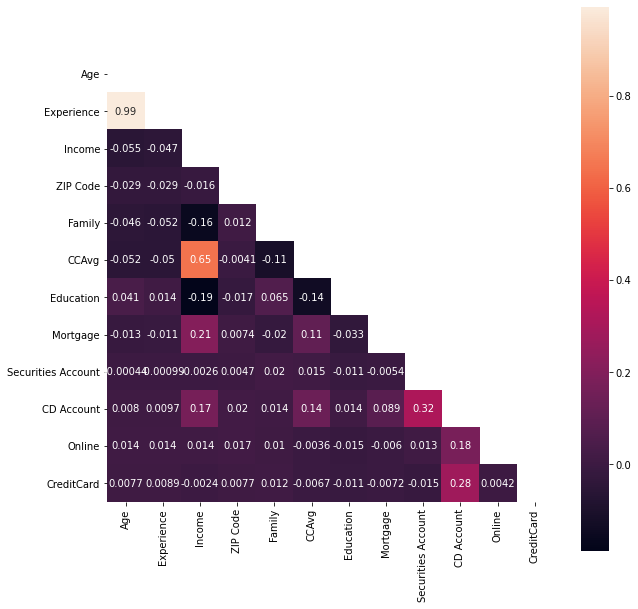

In [51]:
corr = feature.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,annot=True,square=True)

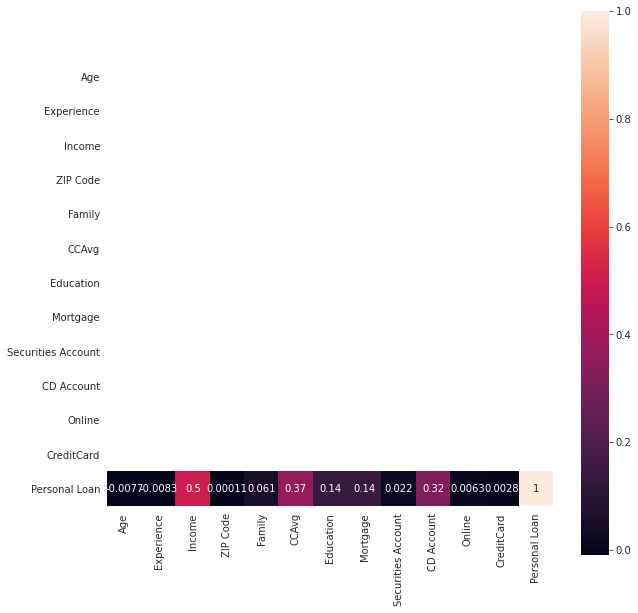

In [52]:
loans_corr = feature.join(target).corr()

mask = np.zeros((13,13))
mask[:12,:]=1

plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    sns.heatmap(loans_corr, annot=True,square=True,mask=mask)

### **Distribution analysis**

Text(0.5, 1.0, 'Mortgage Distribution with KDE')

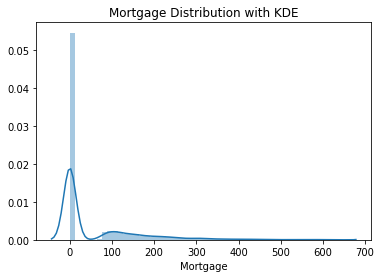

In [53]:
sns.distplot(feature["Mortgage"])
plt.title("Mortgage Distribution with KDE")

**Irregular value handling feature 2 (extreme positive skewed data)**

Text(0.5, 1.0, 'Mortgage Distribution with KDE First Transformation')

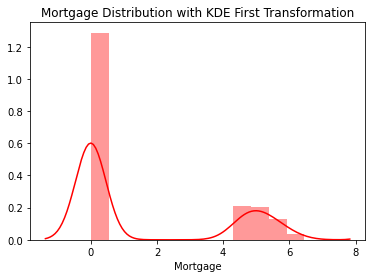

In [54]:
SingleLog_y = np.log1p(feature["Mortgage"])              # Log transformation of the target variable
sns.distplot(SingleLog_y, color ="r")
plt.title("Mortgage Distribution with KDE First Transformation")

Text(0.5, 1.0, 'Mortgage Distribution with KDE Second Transformation')

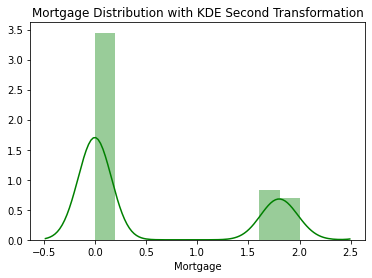

In [55]:
DoubleLog_y = np.log1p(SingleLog_y)
sns.distplot(DoubleLog_y, color ="g")
plt.title("Mortgage Distribution with KDE Second Transformation")

In [56]:
loans["Mortgage"] = DoubleLog_y

**Distribution analysis 2**

In [57]:
source_counts =pd.DataFrame(loans["Personal Loan"].value_counts()).reset_index()
source_counts.columns =["Labels","Personal Loan"]
source_counts

,Labels,Personal Loan
0,0,4520
1,1,480


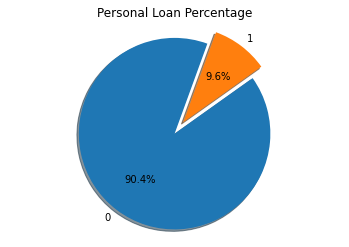

In [58]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["Personal Loan"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Personal Loan Percentage")
plt.show()


Text(0.5, 1.0, 'Income Distribution')

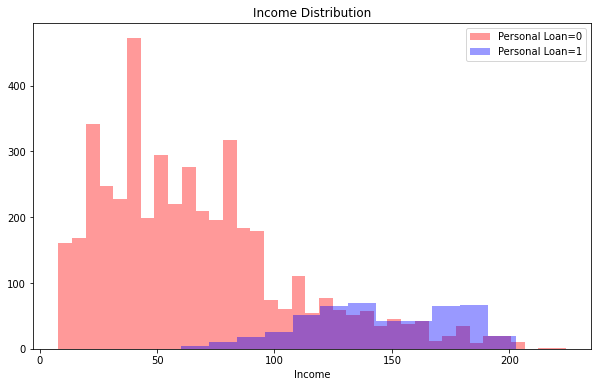

In [59]:
plt.figure(figsize=(10,6))
sns.distplot(loans[loans["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(loans[loans["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Income Distribution")

Text(0.5, 1.0, 'CCAvg Distribution')

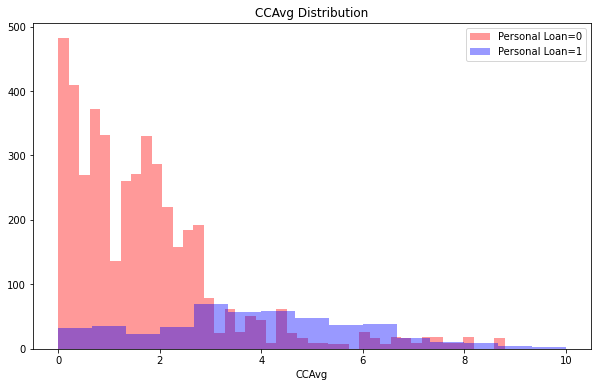

In [60]:
plt.figure(figsize=(10,6))
sns.distplot(loans[loans["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(loans[loans["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("CCAvg Distribution")

Text(0.5, 1.0, 'Experience Distribution')

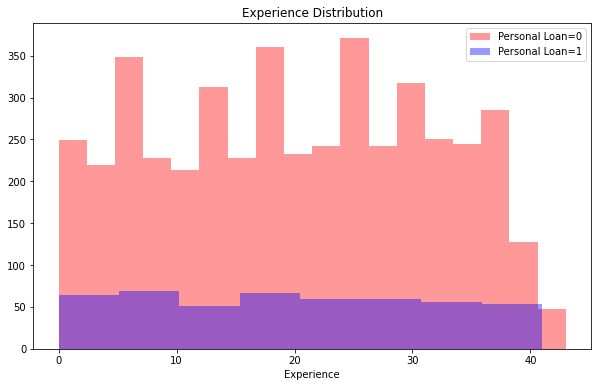

In [61]:
plt.figure(figsize=(10,6))
sns.distplot(loans[loans["Personal Loan"] == 0]['Experience'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(loans[loans["Personal Loan"] == 1]['Experience'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Experience Distribution")

Text(0.5, 1.0, 'Securities Account Countplot')

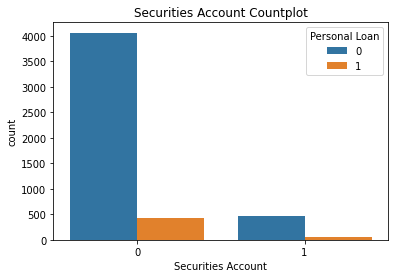

In [62]:
sns.countplot(x='Securities Account',data=loans,hue='Personal Loan')
plt.title("Securities Account Countplot")



Text(0.5, 1.0, 'Family Countplot')

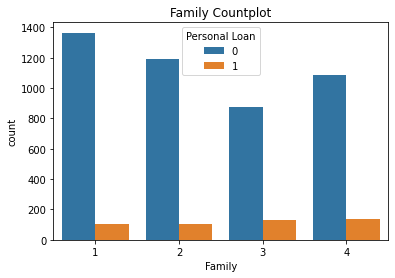

In [63]:
sns.countplot(x='Family',data=loans,hue='Personal Loan')
plt.title("Family Countplot")


Text(0.5, 1.0, 'Education and Income Boxplot')

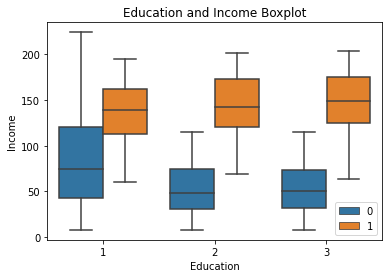

In [64]:
sns.boxplot(x='Education',data=loans,hue='Personal Loan',y='Income')
plt.legend(loc='lower right')
plt.title("Education and Income Boxplot")

Text(0.5, 1.0, 'Family and Income Boxplot')

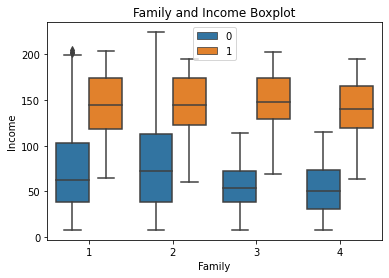

In [65]:
sns.boxplot(x='Family',data=loans,hue='Personal Loan',y='Income')
plt.legend(loc='upper center')
plt.title("Family and Income Boxplot")

### **Feature Selection**

Based on "Feature correlation analysis" & "Distribution analysis" you can throw away some unnecessary features or even you want to add new feature. Please do some handling about feature selection (selecting necessary features) and state your reason for such handling.

In [66]:
feature = loans.drop(["ID","Personal Loan"],axis=1)
target = loans["Personal Loan"]


### **Features Removing**

In [67]:
feature = feature.drop(["ZIP Code","Age","Online","CreditCard"],axis=1)

## **Transformations for Feature Variables**

### **Adding New Feature**

In [68]:
feature["Combination"] = (feature["Income"]/12)**feature["CCAvg"]

### **Feature Scaling**


In [69]:
scaler = StandardScaler();



colscal=["Experience","Mortgage","Income","CCAvg","Combination"]

scaler.fit(feature[colscal])
scaled_features = pd.DataFrame(scaler.transform(feature[colscal]),columns=colscal)

feature =feature.drop(colscal,axis=1)
feature = scaled_features.join(feature)

## **Train-Test Split of Data**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(feature,target,
                                                    test_size=0.30,
                                                    random_state=101)

In [71]:
y_train.value_counts()

0    3166
1     334
Name: Personal Loan, dtype: int64

## **Applying Logistic Regression Model**

In [72]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **Model Evaluation**

In [73]:
predict = logmodel.predict(X_test.values)
predictProb = logmodel.predict_proba(X_test.values)

score1 =cross_val_score(X=X_train,y=y_train,estimator=logmodel,scoring="recall")
score2 =cross_val_score(X=X_train,y=y_train,estimator=logmodel,scoring="roc_auc")

print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_test, predict))
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())

[[1341   13]
 [  66   80]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1354
           1       0.86      0.55      0.67       146

    accuracy                           0.95      1500
   macro avg       0.91      0.77      0.82      1500
weighted avg       0.94      0.95      0.94      1500

Recall Score 0.547945205479452
ROC AUC : 0.9553529875963659
Accuracy : 0.9473333333333334
Matthews Corr_coef : 0.6616939035700475

Cross Validation Recall : 0.5989597467209408
Cross Validation Roc Auc : 0.9543090219118892


In [74]:

train_sizes, train_scores, test_scores = learning_curve(estimator=logmodel,
                                                       X=feature,
                                                       y=target,
                                                       train_sizes=np.linspace(0.01, 1.0, 10),
                                                       cv=10)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


[[0.93333333 0.95555556 0.95555556 0.95555556 0.95555556 0.95555556
  0.95555556 0.95555556 0.95555556 0.95555556]
 [0.94814815 0.9537037  0.95740741 0.95740741 0.95740741 0.95740741
  0.95740741 0.95740741 0.95740741 0.95740741]
 [0.94782609 0.9468599  0.95458937 0.95362319 0.95362319 0.95362319
  0.95362319 0.95362319 0.95362319 0.95362319]
 [0.94640523 0.94705882 0.94901961 0.9496732  0.9496732  0.9496732
  0.9496732  0.9496732  0.9496732  0.9496732 ]
 [0.94567901 0.94814815 0.94864198 0.94962963 0.94765432 0.94617284
  0.94617284 0.94617284 0.94617284 0.94617284]
 [0.94603175 0.9484127  0.94761905 0.94722222 0.94722222 0.9484127
  0.94722222 0.94722222 0.94722222 0.94722222]
 [0.94527363 0.94726368 0.94660033 0.94626866 0.94693201 0.94693201
  0.94859038 0.94792703 0.94792703 0.94792703]
 [0.94415954 0.94472934 0.94529915 0.94558405 0.94444444 0.94643875
  0.94501425 0.94786325 0.94672365 0.94672365]
 [0.94681648 0.94756554 0.94656679 0.94806492 0.94681648 0.94806492
  0.94756554 0

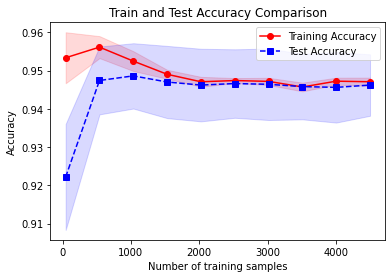

In [75]:
# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and Test Accuracy Comparison")
plt.show()

## **Building various other classification Algorithms and its comparison.**

### **XGBClassifier model**

In [76]:
xgb = XGBClassifier(random_state=101)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**XGBClassifier model with imbalance dataset evaluation**


In [77]:
predict = xgb.predict(X_test)
predictProb = xgb.predict_proba(X_test)

score1 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="recall")
score2 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="roc_auc")

print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print("\nclassification_report :\n",classification_report(y_test, predict))
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_test, predict))
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())

confusion_matrix :
 [[1345    9]
 [  10  136]]

classification_report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1354
           1       0.94      0.93      0.93       146

    accuracy                           0.99      1500
   macro avg       0.97      0.96      0.96      1500
weighted avg       0.99      0.99      0.99      1500

Recall Score 0.9315068493150684
ROC AUC : 0.9972633091196049
Accuracy : 0.9873333333333333
Matthews Corr_coef : 0.9277010549699034

Cross Validation Recall : 0.9013568521031207
Cross Validation Roc Auc : 0.9963409425742089


In [78]:


ros = RandomOverSampler(random_state=101)

X_ros, y_ros = ros.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [79]:
pd.Series(y_ros).value_counts()

1    3166
0    3166
dtype: int64

In [80]:
xgb = XGBClassifier(n_estimators=97,random_state=101)
xgb.fit(X_ros, y_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=97, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**XGBClassifier model with balance dataset (train evaluation)**

In [81]:
predict = xgb.predict(X_train.values)
predictProb = xgb.predict_proba(X_train.values)

score1 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="recall")
score2 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="roc_auc")

print("confusion_matrix :\n",confusion_matrix(y_train, predict))
print("\nclassification_report :\n",classification_report(y_train, predict))
print('Recall Score',recall_score(y_train, predict))
print('ROC AUC :', roc_auc_score(y_train, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_train, predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_train, predict))
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())

confusion_matrix :
 [[3110   56]
 [   1  333]]

classification_report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3166
           1       0.86      1.00      0.92       334

    accuracy                           0.98      3500
   macro avg       0.93      0.99      0.96      3500
weighted avg       0.99      0.98      0.98      3500

Recall Score 0.9970059880239521
ROC AUC : 0.9994429965085622
Accuracy : 0.9837142857142858
Matthews Corr_coef : 0.9154352748144228

Cross Validation Recall : 0.9013568521031207
Cross Validation Roc Auc : 0.996426081813176


**XGBClassifier model with balance dataset (test evaluation)**

In [82]:
predict = xgb.predict(X_test.values)
predictProb = xgb.predict_proba(X_test.values)

score1 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="recall")
score2 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="roc_auc")

print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print("\nclassification_report :\n",classification_report(y_test, predict))
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_test, predict))
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())

confusion_matrix :
 [[1330   24]
 [   3  143]]

classification_report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1354
           1       0.86      0.98      0.91       146

    accuracy                           0.98      1500
   macro avg       0.93      0.98      0.95      1500
weighted avg       0.98      0.98      0.98      1500

Recall Score 0.9794520547945206
ROC AUC : 0.9974960037231136
Accuracy : 0.982
Matthews Corr_coef : 0.9062836949343842

Cross Validation Recall : 0.9013568521031207
Cross Validation Roc Auc : 0.996426081813176


In [83]:


train_sizes, train_scores, test_scores = learning_curve(estimator=xgb,
                                                       X=feature,
                                                       y=target,
                                                       train_sizes=np.linspace(0.01, 1.0, 10),
                                                       cv=10)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.99814815 0.99444444 0.99444444 0.99444444 0.99444444 0.99444444
  0.99444444 0.99444444 0.99444444 0.99444444]
 [0.99516908 0.99130435 0.99516908 0.9942029  0.9942029  0.9942029
  0.9942029  0.9942029  0.9942029  0.9942029 ]
 [0.99281046 0.99477124 0.99673203 0.99346405 0.99215686 0.99215686
  0.99215686 0.99215686 0.99215686 0.99215686]
 [0.99111111 0.99259259 0.99358025 0.99209877 0.99358025 0.99308642
  0.99308642 0.99308642 0.99308642 0.99308642]
 [0.99047619 0.99325397 0.98928571 0.99246032 0.99166667 0.99126984
  0.99166667 0.99166667 0.99166667 0.99166667]
 [0.9893864  0.9920398  0.99104478 0.99270315 0.9920398  0.9907131
  0.99104478 0.98839138 0.98839138 0.98839138]
 [0.99088319 0.99259259 0.99202279 0.99145299 0.99230769 0.99173789
  0.99145299 0.99059829 0.99031339 0.99031339]
 [0.99101124 0.99275905 0.9937578  0.99275905 0.99250936 0.99126092
  0.99200999 0.9902621

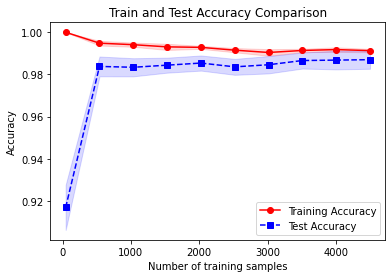

In [84]:
# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and Test Accuracy Comparison")
plt.show()

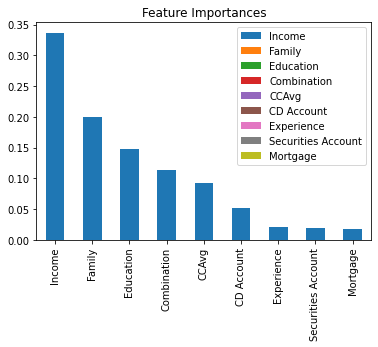

In [85]:
coef1 = pd.Series(xgb.feature_importances_,feature.columns).sort_values(ascending=False)

pd.DataFrame(coef1,columns=["Features"]).transpose().plot(kind="bar",title="Feature Importances") #for the legends

coef1.plot(kind="bar",title="Feature Importances")

### **Decision Tree**

In [86]:

dtree = DecisionTreeClassifier(min_samples_leaf=10)
dtree.fit(X_ros,y_ros)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
predict = dtree.predict(X_test.values)
predictProb = dtree.predict_proba(X_test.values)

score1 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="recall")
score2 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="roc_auc")

print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print("\nclassification_report :\n",classification_report(y_test, predict))
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_test, predict))
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())


confusion_matrix :
 [[1333   21]
 [   8  138]]

classification_report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1354
           1       0.87      0.95      0.90       146

    accuracy                           0.98      1500
   macro avg       0.93      0.96      0.95      1500
weighted avg       0.98      0.98      0.98      1500

Recall Score 0.9452054794520548
ROC AUC : 0.9805750591853666
Accuracy : 0.9806666666666667
Matthews Corr_coef : 0.8951868924845687

Cross Validation Recall : 0.9013568521031207
Cross Validation Roc Auc : 0.996426081813176


### **Random Forest Classifier**

In [88]:

rfc = RandomForestClassifier(n_estimators=101,max_depth=250,max_leaf_nodes=50,random_state=101)
rfc.fit(X_ros,y_ros)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=250, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [89]:
predict = rfc.predict(X_train.values)
predictProb = rfc.predict_proba(X_train.values)

score1 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="recall")
score2 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="roc_auc")

print("confusion_matrix :\n",confusion_matrix(y_train, predict))
print("\nclassification_report :\n",classification_report(y_train, predict))
print('Recall Score',recall_score(y_train, predict))
print('ROC AUC :', roc_auc_score(y_train, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_train, predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_train, predict))
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())

confusion_matrix :
 [[3134   32]
 [   1  333]]

classification_report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3166
           1       0.91      1.00      0.95       334

    accuracy                           0.99      3500
   macro avg       0.96      0.99      0.97      3500
weighted avg       0.99      0.99      0.99      3500

Recall Score 0.9970059880239521
ROC AUC : 0.999878953400842
Accuracy : 0.9905714285714285
Matthews Corr_coef : 0.9487155422364748

Cross Validation Recall : 0.9013568521031207
Cross Validation Roc Auc : 0.996426081813176


In [90]:
predict = rfc.predict(X_test.values)
predictProb = rfc.predict_proba(X_test.values)

score1 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="recall")
score2 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="roc_auc")

print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print("\nclassification_report :\n",classification_report(y_test, predict))
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_test, predict))
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())

confusion_matrix :
 [[1337   17]
 [   4  142]]

classification_report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1354
           1       0.89      0.97      0.93       146

    accuracy                           0.99      1500
   macro avg       0.95      0.98      0.96      1500
weighted avg       0.99      0.99      0.99      1500

Recall Score 0.9726027397260274
ROC AUC : 0.9968232128042736
Accuracy : 0.986
Matthews Corr_coef : 0.9244117592040545

Cross Validation Recall : 0.9013568521031207
Cross Validation Roc Auc : 0.996426081813176


In [91]:


train_sizes, train_scores, test_scores = learning_curve(estimator=rfc,
                                                       X=feature,
                                                       y=target,
                                                       train_sizes=np.linspace(0.01, 1.0, 10),
                                                       cv=10)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         0.99934641 1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.99802469 0.99654321 0.99901235 0.99555556 0.99802469 0.99802469
  0.99802469 0.99802469 0.99802469 0.99802469]
 [0.99642857 0.99563492 0.99642857 0.99603175 0.99642857 0.99444444
  0.99642857 0.99642857 0.99642857 0.99642857]
 [0.9946932  0.99369818 0.9946932  0.99402985 0.9946932  0.9933665
  0.99402985 0.99436153 0.99436153 0.99436153]
 [0.99458689 0.99487179 0.9951567  0.99458689 0.99430199 0.99287749
  0.99487179 0.99344729 0.99316239 0.99316239]
 [0.99450687 0.9937578  0.99475655 0.99400749 0.99425718 0.99325843
  0.99425718 0.99300874 0.99400749 0.99400749

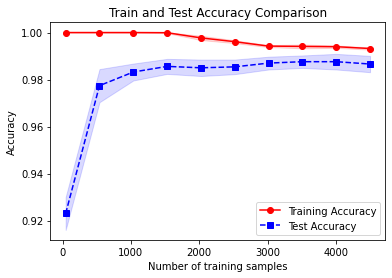

In [92]:
# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and Test Accuracy Comparison")
plt.show()

### **KNN**

In [93]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_ros,y_ros)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [94]:
predict = knn.predict(X_test.values)
predictProb = knn.predict_proba(X_test.values)

score1 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="recall")
score2 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="roc_auc")

print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_test, predict))
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())

[[1338   16]
 [  26  120]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1354
           1       0.88      0.82      0.85       146

    accuracy                           0.97      1500
   macro avg       0.93      0.91      0.92      1500
weighted avg       0.97      0.97      0.97      1500

Recall Score 0.821917808219178
ROC AUC : 0.9201048137431456
Accuracy : 0.972
Matthews Corr_coef : 0.8362733796511278

Cross Validation Recall : 0.9013568521031207
Cross Validation Roc Auc : 0.996426081813176


In [95]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_ros,y_ros)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

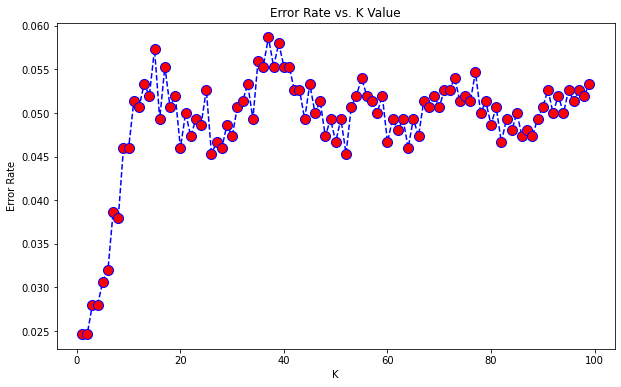

In [96]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### **Neural Network**

In [97]:
features=original.drop("Personal Loan",axis=1)
targets=original["Personal Loan"]

loans = features.join(targets)

In [98]:
loans.shape

(5000, 14)

In [99]:



for i in range(1,7):
    copy = loans
    copy['Income']=copy['Income']+random.gauss(1,10) # add noice to income
    loans=loans.append(copy,ignore_index=True) # make voice df 2x as big
    print("shape of df after {0}th intertion of this loop is {1}".format(i,loans.shape))

shape of df after 1th intertion of this loop is (10000, 14)
shape of df after 2th intertion of this loop is (20000, 14)
shape of df after 3th intertion of this loop is (40000, 14)
shape of df after 4th intertion of this loop is (80000, 14)
shape of df after 5th intertion of this loop is (160000, 14)
shape of df after 6th intertion of this loop is (320000, 14)


In [100]:
loans["Experience"] = loans["Experience"].apply(abs)

In [101]:
feature = loans.drop(["ID","Personal Loan"],axis=1)
target = loans["Personal Loan"]

feature = feature.drop(["ZIP Code","Age","Online","CreditCard"],axis=1)

# feature["Combination"] = (feature["Income"]/12)-feature["CCAvg"]
# feature["Combination"] = (feature["Income"]/12)/feature["CCAvg"]
# feature["Combination"] = (feature["Income"]/12)*feature["CCAvg"]
feature["Combination"] = (feature["Income"]/12)**feature["CCAvg"]


scaler = StandardScaler();



colscal=["Experience","Mortgage","Income","CCAvg","Combination"]

scaler.fit(feature[colscal])
scaled_features = pd.DataFrame(scaler.transform(feature[colscal]),columns=colscal)

feature =feature.drop(colscal,axis=1)
feature = scaled_features.join(feature)


X_train, X_test, y_train, y_test = train_test_split(feature,target,
                                                    test_size=0.30,
                                                    random_state=101)



ros = RandomOverSampler(random_state=101)

X_ros, y_ros = ros.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [102]:
clf = Sequential([
    Dense(units=72, kernel_initializer='uniform', input_dim=9, activation='relu'),
    Dense(72, kernel_initializer='uniform', activation='relu'),
    Dense(72, kernel_initializer='uniform', activation='relu'),
    Dropout(0.1),
    Dense(72, kernel_initializer='uniform', activation='relu'),
    Dropout(0.1),
    Dense(72, kernel_initializer='uniform', activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 72)                720       
_________________________________________________________________
dense_1 (Dense)              (None, 72)                5256      
_________________________________________________________________
dense_2 (Dense)              (None, 72)                5256      
_________________________________________________________________
dropout (Dropout)            (None, 72)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 72)                5256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 72)                5

In [103]:
def recall(y_true, y_pred): 

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) 
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1))) 
    recall = true_positives / (possible_positives + K.epsilon()) 
    return recall

In [104]:
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=[recall,'accuracy'])

In [105]:
history= clf.fit(X_ros, y_ros, batch_size=50, epochs=25)

Epoch 1/25
8104/8104 [==============================] - 14s 2ms/step - loss: 0.0588 - recall: 0.9831 - accuracy: 0.9764
Epoch 2/25
8104/8104 [==============================] - 15s 2ms/step - loss: 0.0086 - recall: 0.9979 - accuracy: 0.9974
Epoch 3/25
8104/8104 [==============================] - 15s 2ms/step - loss: 0.0027 - recall: 0.9993 - accuracy: 0.9992
Epoch 4/25
8104/8104 [==============================] - 14s 2ms/step - loss: 0.0038 - recall: 0.9990 - accuracy: 0.9989
Epoch 5/25
8104/8104 [==============================] - 15s 2ms/step - loss: 0.0020 - recall: 0.9995 - accuracy: 0.9995
Epoch 6/25
8104/8104 [==============================] - 14s 2ms/step - loss: 0.0011 - recall: 0.9997 - accuracy: 0.9997
Epoch 7/25
8104/8104 [==============================] - 14s 2ms/step - loss: 0.0019 - recall: 0.9997 - accuracy: 0.9996
Epoch 8/25
8104/8104 [==============================] - 14s 2ms/step - loss: 3.9593e-04 - recall: 0.9999 - accuracy: 0.9999
Epoch 9/25
8104/8104 [==============

In [106]:
original = pd.read_excel(r'Data/Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

feature=original.drop("Personal Loan",axis=1)
target=original["Personal Loan"]

loans = feature.join(target)

loans["Experience"] = loans["Experience"].apply(abs)

feature = loans.drop(["ID","Personal Loan"],axis=1)
target = loans["Personal Loan"]

feature = feature.drop(["ZIP Code","Age","Online","CreditCard"],axis=1)

# feature["Combination"] = (feature["Income"]/12)-feature["CCAvg"]
# feature["Combination"] = (feature["Income"]/12)/feature["CCAvg"]
# feature["Combination"] = (feature["Income"]/12)*feature["CCAvg"]
feature["Combination"] = (feature["Income"]/12)**feature["CCAvg"]


scaler = StandardScaler();



colscal=["Experience","Mortgage","Income","CCAvg","Combination"]

scaler.fit(feature[colscal])
scaled_features = pd.DataFrame(scaler.transform(feature[colscal]),columns=colscal)

feature =feature.drop(colscal,axis=1)
feature = scaled_features.join(feature)


X_train, X_test, y_train, y_test = train_test_split(feature,target,
                                                    test_size=0.30,
                                                    random_state=101)

In [107]:
score = clf.evaluate(X_test, y_test, batch_size=128)
print('\nAnd the Test Score is ',"\nRecall :", score[1],"\nAccuracy :",score[2])

12/12 [==============================] - 0s 1ms/step - loss: 5.9072e-08 - recall: 1.0000 - accuracy: 1.0000

And the Test Score is  
Recall : 1.0 
Accuracy : 1.0


In [108]:
predictProb = pd.DataFrame(clf.predict(X_test.values))


def fungsi(x):
    if x<0.5:
        return 0
    else:
        return 1

predict = predictProb[0].apply(fungsi)

In [109]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[0]))
print('Accuracy :',accuracy_score(y_test, predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_test, predict))

[[1354    0]
 [   0  146]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1354
           1       1.00      1.00      1.00       146

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Recall Score 1.0
ROC AUC : 1.0
Accuracy : 1.0
Matthews Corr_coef : 1.0


In [110]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'recall', 'accuracy'])

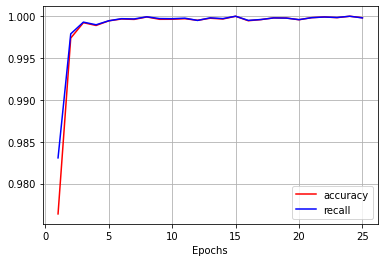

In [111]:
#plot the metrics during training. 
epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, history_dict['accuracy'], 'r',label='accuracy')
plt.plot(epochs, history_dict['recall'], 'b',label='recall')

plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

## **Business Understanding of this Model**

There are various positive aspects of this Machine Learning Model.



1.   It will be helpful in targeting the particular customer.
2.   It will be helpful in minimize the unneccessary spending on less valuable things.
3.   It will also helpful in more accuracy while predicting the customer.

These are tge some basics aspects of this model. This model not only useful in this type of sector but also we can use another sectors just by changing data and some code. This is very helpful to increase the growth of the business.

